# Intro to Scikit-Learn

Scikit-Learn is a Python library that provides many machine learning algorithms. It is built upon NumPy. It is also a great library for beginners to learn machine learning because it has a simple and consistent interface.

In [1]:
# remember that the package name is scikit-learn but the import name is sklearn

import sklearn

## Load the data

Models need data to learn from. We'll use the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), a classic dataset in machine learning and statistics. It's included in scikit-learn, so we can load it from there.

In [2]:
from sklearn.datasets import load_iris


# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

## Split the data into training and test sets

We'll use part of the data to train the model, and part of the data to evaluate the model. This is a common practice in machine learning.

In [3]:
from sklearn.model_selection import train_test_split


# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select a model

We'll use a [K-nearest neighbors classifier](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) to classify the data. This is a simple model that's easy to understand. It works by comparing every data point in the training set to the data point we want to predict. The model finds the most similar data points in the training set, and uses their labels to predict the label for the new data point.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Create the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

## Train the model

We'll train the model by showing it the training data, and telling it the correct label for each data point. The model will learn to associate the data points with the correct labels.

In [5]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluate the model

We'll evaluate the model by showing it the test data, and asking it to predict the label for each data point. Then we'll compare the model's predictions to the correct labels.

In [6]:
# this shows how we can perform inference on a random sample
import numpy as np


y_example = np.array([[6.1, 2.8, 4.7, 1.2]]) # shape is (1, 4)
knn.predict(y_example)

array([1])

In [7]:
# this shows how we can perform inference on the test set

y_pred = knn.predict(X_test)
y_pred, y_test  # shoes the predicted and actual values

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]))

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy is {accuracy}")

# Print the precision
precision = precision_score(y_test, y_pred, average=None)
print(f"The precision is {precision} (one value per class)")

# Print the recall
recall = recall_score(y_test, y_pred, average=None)
print(f"The recall is {recall} (one value per class)")

# Print the F1 score
f1 = f1_score(y_test, y_pred, average=None)
print(f"The F1 score is {f1} (one value per class)")

The accuracy is 1.0
The precision is [1. 1. 1.] (one value per class)
The recall is [1. 1. 1.] (one value per class)
The F1 score is [1. 1. 1.] (one value per class)


# Exercise: Lord Vinum's Wine

Lord Vinum has a wine cellar, and he wants to use machine learning to predict the quality of his wine. He has a dataset of 178 wines, and he wants to use it to train a model that can predict the quality of a wine based on its characteristics.

In [9]:
# Create the dataset for the Elixir Wine
from sklearn import datasets
import pandas as pd


# The age-old Wine Scroll that holds secrets of the wines
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# dataset has 3 classes, but we will only use 2, so we will mix the last 2 classes
df['wine_type'] = [0 if i == 0 else 1 for i in wine.target]  # 0: Regular Wine, 1: Elixir Wine

# Print the first 5 rows of the data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Step 1: Split the data into training and test sets

We are working with a dataframe so we first select the columns we want to use as features and the column we want to predict (the column is the "wine_type"). We then split the data into training and test sets.

In [10]:
from sklearn.model_selection import train_test_split


X = df.drop('wine_type', axis=1)  # Features. Shape (178, 13)
y = df['wine_type']  # Target variable. Shape (178,)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Train the model

We will use a Logistic Regression model. Althought it says (regression) in the name, it is actually a classification model. We will train the model by showing it the training data, and telling it the correct label for each data point. The model will learn to associate the data points with the correct labels.

In [11]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression classifier
model = LogisticRegression(max_iter=1000)  # max_iter is the number of iterations
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step 3: Evaluate the model

We will evaluate the model by showing it the test data, and asking it to predict the label for each data point. Then we'll compare the model's predictions to the correct labels.

In [12]:
# We first obtain the predictions on the test set

y_pred = model.predict(X_test)

In [13]:
# com pare the predicted and actual values

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Print the accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy", acc)

# Print the precision
precision = precision_score(y_test, y_pred)
print("Precision", precision)

# Print the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

# Print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1", f1)


Accuracy 1.0
Precision 1.0
Recall 1.0
F1 1.0


### Step 4: Plot different metrics

We will plot the confusion matrix

<Axes: >

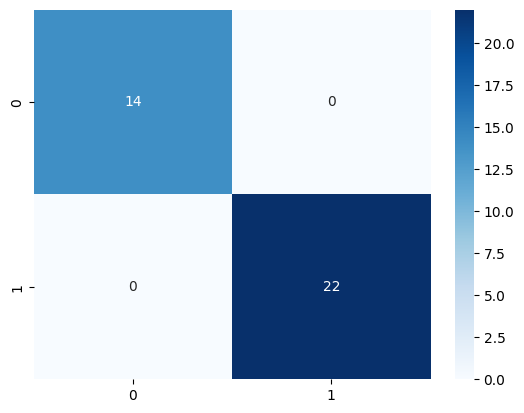

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')